## Welcome to the pipeline of my zillow project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import aquire
import prep
import split_scale
import model

from jupyterthemes import jtplot
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = aquire.get_data("zillow")

In [20]:
df = prep.remove_zeros(prep.rename_columns(df))

In [21]:
train, test = split_scale.split_my_data(df, .80)

In [23]:
X_train = train.drop(columns="taxvalue")
X_test = test.drop(columns="taxvalue")
y_train = train[["taxvalue"]]
y_test = test[["taxvalue"]]

In [24]:
baseline = model.compute_baseline(y_train)

In [25]:
predictions = y_train.rename(columns = {"taxvalue":"actuals"})
predictions = model.linear_model(X_train, y_train, predictions).round(0)

In [26]:
model.evaluate(predictions.actuals, predictions.lm)

(318424728031.4716, 3808041322528369.0, 564291.3503071544, 0.39270301701223864)

In [27]:
model.evaluate(predictions.actuals, baseline)

(524331154198.88184, 6270476273064428.0, 724107.1427619547, 0.0)

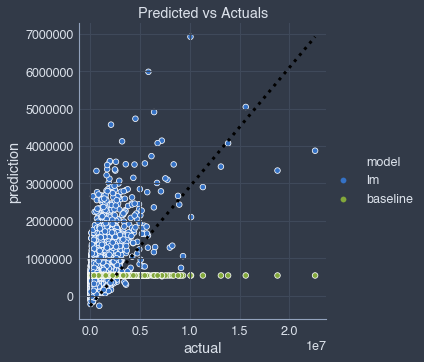

In [30]:
model.plot_linear_model(predictions.actuals,predictions.lm, baseline)
jtplot.style()

plt.plot([predictions.actuals.min(), predictions.actuals.max()], [predictions.lm.min(), predictions.lm.max()],
         c='black', ls=':', linewidth = 3)
plt.title('Predicted vs Actuals')
plt.show()